# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from config import api_key

from random import *
import urllib
import openweathermapy.core as ow
from config import *
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print (api_key)

25bc90a1196e6f153eece0bc0b0fc9eb


## Generate Cities List

In [2]:
#select random latitude (from -90 to +90)

city_list = pd.DataFrame()

for i in range(600):
    lat=(random()-.5)*randint(-180,180)
    lon=(random()-.5)*randint(-360,360)
    coords=pd.DataFrame([[lat,lon]], columns=['lat','lon'])
    city_list=city_list.append(coords)
    
    
city_list=city_list.reset_index()
city_list=city_list[['lat','lon']]
city_list.head(5)

,lat,lon
0,-28.019676,10.307931
1,-0.668017,22.729792
2,9.916906,4.910052
3,-28.610332,-3.712044
4,-37.645668,50.529555


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
%%capture
#Use Citipy to find the nearest city to each pair of latlongs

for row in range(0,len(city_list)):
    #print(city_list.loc[row]['lat'])
    lat = city_list.loc[row]['lat']
    lon = city_list.loc[row]['lon']    
    city = citipy.nearest_city(lat,lon)
    city_list.set_value(row, "city", city.city_name.title())
    city_list.set_value(row, "country", city.country_code.upper())
    

In [4]:
#Make sure the dataframe looks reasonable
city_list.head(5)


,lat,lon,city,country
0,-28.019676,10.307931,Luderitz,NA
1,-0.668017,22.729792,Boende,CD
2,9.916906,4.910052,Kontagora,NG
3,-28.610332,-3.712044,Jamestown,SH
4,-37.645668,50.529555,Taolanaro,MG


In [6]:
#print weather summary for all city_list in the list

base_url = 'http://api.openweathermap.org/data/2.5/weather?'

city_list['temp']=''
city_list['clouds']=''
city_list['humidity']=''
city_list['wind_speed']=''

#for city_list that have no data, add the row index to a list. Then we will drop all of them afterwards.
rows_to_drop = []

for row in range(0, len(city_list)):
    
    try:
        city=city_list.loc[row]['city']
        units='Imperial'
        query_url = base_url + "&units=" + units+"&appid=" + api_key + "&q=" + city 
        response = requests.get(query_url)
        result=response.json()

        city=city_list.loc[row]['city']
        temp=result['main']['temp']
        clouds=result['clouds']['all']
        humidity=result['main']['humidity']
        wind_speed=result['wind']['speed']

        print(f"Processing data for City # {row}: {city}")
        print(response.url)    

        #add values to the dataframe
        city_list.set_value(row, "temp", temp)
        city_list.set_value(row, "clouds", clouds)    
        city_list.set_value(row, "humidity", humidity)
        city_list.set_value(row, "wind_speed", wind_speed) 
    except KeyError:
        print(f"Processing data for City # {row}: {city}")
        print(response.url)    
        #add values to the dataframe
        rows_to_drop.append(row)
        print("No data available. Skipping...")


Processing data for City # 0: Luderitz
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Luderitz


C:\Users\ekare\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\ekare\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\ekare\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\ekare\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Processing data for City # 1: Boende
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Boende
Processing data for City # 2: Kontagora
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Kontagora
Processing data for City # 3: Jamestown
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Jamestown
Processing data for City # 4: Taolanaro
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Taolanaro
No data available. Skipping...
Processing data for City # 5: Hithadhoo
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Hithadhoo
Processing data for City # 6: Mitu
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Mitu
Processing data for City # 7: Gambo
http://api.openweathermap

Processing data for City # 55: Miandoab
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Miandoab
Processing data for City # 56: Marovoay
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Marovoay
Processing data for City # 57: Idlib
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Idlib
Processing data for City # 58: Anloga
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Anloga
Processing data for City # 59: Paradwip
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Paradwip
No data available. Skipping...
Processing data for City # 60: Ushuaia
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Ushuaia
Processing data for City # 61: Tabou
http://api.openweathermap.

Processing data for City # 107: Busselton
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Busselton
Processing data for City # 108: Atuona
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Atuona
Processing data for City # 109: Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Ribeira%20Grande
Processing data for City # 110: Luderitz
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Luderitz
Processing data for City # 111: Victoria
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Victoria
Processing data for City # 112: Bredasdorp
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Bredasdorp
Processing data for City # 113: Aljezur
http://api.openweath

Processing data for City # 161: Shinyanga
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Shinyanga
Processing data for City # 162: Atuona
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Atuona
Processing data for City # 163: Laguna
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Laguna
Processing data for City # 164: Lichinga
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Lichinga
Processing data for City # 165: Bengkulu
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Bengkulu
No data available. Skipping...
Processing data for City # 166: Port Alfred
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Port%20Alfred
Processing data for City # 167: Mar Del Pla

Processing data for City # 214: Guia De Isora
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Guia%20De%20Isora
Processing data for City # 215: Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Puerto%20Ayora
Processing data for City # 216: Canto Do Buriti
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Canto%20Do%20Buriti
Processing data for City # 217: Wankaner
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Wankaner
Processing data for City # 218: Cayenne
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Cayenne
Processing data for City # 219: Tamandare
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Tamandare
Processing data for City # 220: Zh

Processing data for City # 268: Tasiilaq
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Tasiilaq
Processing data for City # 269: Bubaque
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Bubaque
Processing data for City # 270: Luderitz
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Luderitz
Processing data for City # 271: Hilo
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Hilo
Processing data for City # 272: Saint-Joseph
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Saint-Joseph
Processing data for City # 273: Puerto Narino
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Puerto%20Narino
Processing data for City # 274: Edea
http://api.openweathermap.org

Processing data for City # 320: Arraial Do Cabo
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Arraial%20Do%20Cabo
Processing data for City # 321: Coahuayana
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Coahuayana
Processing data for City # 322: Bardiyah
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Bardiyah
No data available. Skipping...
Processing data for City # 323: Port Lincoln
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Port%20Lincoln
Processing data for City # 324: Japura
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Japura
Processing data for City # 325: Biltine
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Biltine
Processing data for

Processing data for City # 372: Victoria
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Victoria
Processing data for City # 373: Adrar
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Adrar
Processing data for City # 374: Hobyo
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Hobyo
Processing data for City # 375: Atar
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Atar
Processing data for City # 376: Laguna
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Laguna
Processing data for City # 377: Gamba
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Gamba
Processing data for City # 378: Ouesso
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appi

Processing data for City # 425: Paamiut
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Paamiut
Processing data for City # 426: Bredasdorp
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Bredasdorp
Processing data for City # 427: Namibe
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Namibe
Processing data for City # 428: Tromso
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Tromso
Processing data for City # 429: Abu Dhabi
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Abu%20Dhabi
Processing data for City # 430: Santa Maria
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Santa%20Maria
Processing data for City # 431: Nahariyya
http://api.openweathermap.or

Processing data for City # 477: Wagar
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Wagar
Processing data for City # 478: Jamestown
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Jamestown
Processing data for City # 479: Buarcos
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Buarcos
Processing data for City # 480: Lebu
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Lebu
Processing data for City # 481: Itarema
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Itarema
Processing data for City # 482: Jamestown
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Jamestown
Processing data for City # 483: San Cristobal
http://api.openweathermap.org/data/2.5/weath

Processing data for City # 531: Barkhan
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Barkhan
Processing data for City # 532: Coquimbo
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Coquimbo
Processing data for City # 533: Maghama
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Maghama
No data available. Skipping...
Processing data for City # 534: Acurenam
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Acurenam
Processing data for City # 535: Luderitz
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Luderitz
Processing data for City # 536: Thinadhoo
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Thinadhoo
Processing data for City # 537: Lerwick
http://

Processing data for City # 583: Pauini
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Pauini
Processing data for City # 584: Japura
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Japura
Processing data for City # 585: Dogondoutchi
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Dogondoutchi
Processing data for City # 586: Mopti
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Mopti
Processing data for City # 587: Praia
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Praia
Processing data for City # 588: Attawapiskat
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Attawapiskat
No data available. Skipping...
Processing data for City # 589: Chepareria
http:/

In [7]:
#check the dataframe again
city_list.head(5)


,lat,lon,city,country,temp,clouds,humidity,wind_speed
0,-28.019676,10.307931,Luderitz,NA,58.61,0,75,19.08
1,-0.668017,22.729792,Boende,CD,72.11,56,97,2.75
2,9.916906,4.910052,Kontagora,NG,79.58,76,87,4.54
3,-28.610332,-3.712044,Jamestown,SH,37.55,0,78,2.75
4,-37.645668,50.529555,Taolanaro,MG,,,,


In [8]:
city_list.dtypes
len(city_list )

600

In [9]:
city_list['lat'] = city_list['lat'].astype('float') 
city_list['lon'] = city_list['lon'].astype('float')

city_list.head(5)


,lat,lon,city,country,temp,clouds,humidity,wind_speed
0,-28.019676,10.307931,Luderitz,NA,58.61,0,75,19.08
1,-0.668017,22.729792,Boende,CD,72.11,56,97,2.75
2,9.916906,4.910052,Kontagora,NG,79.58,76,87,4.54
3,-28.610332,-3.712044,Jamestown,SH,37.55,0,78,2.75
4,-37.645668,50.529555,Taolanaro,MG,,,,


In [10]:
city_list[['temp','clouds', 'humidity','wind_speed']] = city_list[['temp','clouds', 'humidity','wind_speed']].apply(pd.to_numeric)
#city_list.dropna(temp='NaT')
city_list.head(5)

,lat,lon,city,country,temp,clouds,humidity,wind_speed
0,-28.019676,10.307931,Luderitz,NA,58.61,0.0,75.0,19.08
1,-0.668017,22.729792,Boende,CD,72.11,56.0,97.0,2.75
2,9.916906,4.910052,Kontagora,NG,79.58,76.0,87.0,4.54
3,-28.610332,-3.712044,Jamestown,SH,37.55,0.0,78.0,2.75
4,-37.645668,50.529555,Taolanaro,MG,NaN,NaN,NaN,NaN


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#WRITE TO CSV
city_list.head()
city_list.to_csv('weather_data_output.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

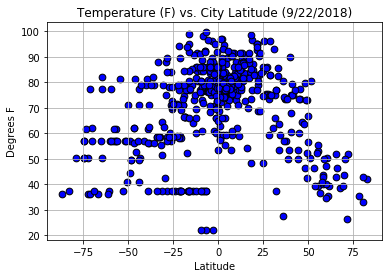

In [12]:
#Temperature (F) vs. Latitude

x_axis = city_list['lat']
y_axis = city_list['temp']

plt.title("Temperature (F) vs. City Latitude (9/22/2018)")
plt.xlabel("Latitude")
plt.ylabel("Degrees F")
plt.grid()
plt.scatter(x_axis, y_axis, marker="o", color="blue", edgecolor='Black',s=45)

#SAVE TO PNG
plt.savefig('Temp_Latitude.png')

plt.show()

#### Latitude vs. Humidity Plot

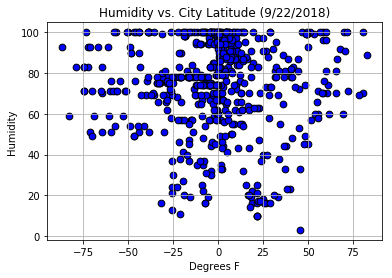

In [17]:
#Temperature (F) vs. Latitude

x_axis = city_list['lat']
y_axis = city_list['humidity']

plt.title("Humidity vs. City Latitude (9/22/2018)")
plt.xlabel("Degrees F")
plt.ylabel("Humidity")
plt.grid()
plt.scatter(x_axis, y_axis, marker="o", color="blue", edgecolor='Black',s=45)

#SAVE TO PNG
plt.savefig('Humidity_Latitude.png')

plt.show()

#### Latitude vs. Cloudiness Plot

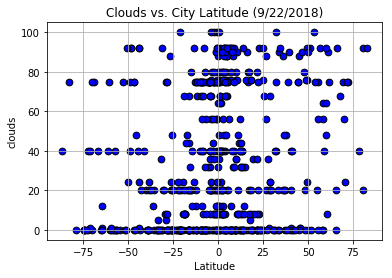

In [14]:
#Temperature (F) vs. Latitude

x_axis = city_list['lat']
y_axis = city_list['clouds']

plt.title("Clouds vs. City Latitude (9/22/2018)")
plt.xlabel("Latitude")
plt.ylabel("clouds")
plt.grid()
plt.scatter(x_axis, y_axis, marker="o", color="blue", edgecolor='Black',s=45)

#SAVE TO PNG
plt.savefig('Clouds_Latitude.png')

plt.show()

#### Latitude vs. Wind Speed Plot

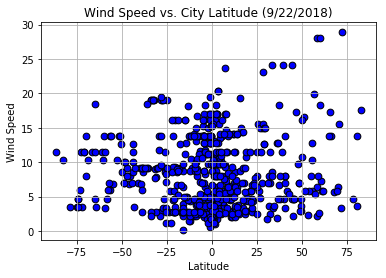

In [15]:
#Temperature (F) vs. Latitude

x_axis = city_list['lat']
y_axis = city_list['wind_speed']

plt.title("Wind Speed vs. City Latitude (9/22/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.scatter(x_axis, y_axis, marker="o", color="blue", edgecolor='Black',s=45)

#SAVE TO PNG
plt.savefig('Wind_speed_Latitude.png')

plt.show()

In [16]:
# Observations 

# In the Temperature vs. Latitude scatter plot, there are no reported cities in the random sampling that currently have a temperature lower than 50 degrees F.  The data represents that the further away from the equator, the lower the temperature.
# In the Wind Speed (mph) vs. Latitude scatter plot, cloudiness seems well spread out for this day and therefore is inconclusive.  However, there are outliers in the random sampling that have wind speeds greater an 25 MPH.
# In the Temperature vs. Humidity scatter plot, lower humidity (less than 40) is only represented for cities within 25 degrees of the equator.
